In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

## Summary

This notebook will analyze five different before and after statistics of 3750 golfers who subscribed to a paid premium feature of a golf application. There will be linear regression (OLS) 

## Data Preprocessing

In [2]:
df = pd.read_csv('before-after-premium.csv')
df.drop(columns = ['user_id'], inplace = True)

In [3]:
df

,avgBeforeToPar,avgBeforeFairwayHits,avgBeforeGir,avgBeforePuttsPerHole,avgBeforeUpAndDownPercentage,avgAfterToPar,avgAfterFairwayHits,avgAfterGir,avgAfterPuttsPerHole,avgAfterUpAndDownPercentage
0,16.000000,9.666667,6.000000,1.851852,35.269360,11.000000,9.000000,8.000000,1.851852,33.333333
1,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,22.000000,4.333333,4.000000,2.037037,23.333333
2,4.000000,6.333333,9.666667,1.740741,35.185185,1.666667,6.000000,9.666667,1.648148,81.944444
3,26.666667,5.666667,2.000000,2.055556,26.785714,23.666667,4.333333,4.333333,2.296296,31.746032
4,1.333333,10.666667,13.000000,1.851852,36.666667,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
...,...,...,...,...,...,...,...,...,...,...
3745,15.666667,5.666667,6.000000,1.722222,56.944444,14.666667,7.333333,6.666667,1.870370,33.968254
3746,4.666667,10.000000,12.000000,1.925926,57.777778,9.000000,7.000000,8.000000,1.944444,55.555556
3747,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,20.000000,4.666667,2.000000,1.944444,19.358974
3748,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000


In [4]:
df.describe()

,avgBeforeToPar,avgBeforeFairwayHits,avgBeforeGir,avgBeforePuttsPerHole,avgBeforeUpAndDownPercentage,avgAfterToPar,avgAfterFairwayHits,avgAfterGir,avgAfterPuttsPerHole,avgAfterUpAndDownPercentage
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,-268.548444,-275.975289,-276.763644,-279.420652,-259.431301,-223.649867,-231.413333,-232.240533,-235.072207,-213.590625
std,457.163685,452.469488,451.978735,450.311939,463.071049,432.241343,427.865312,427.406646,425.823396,438.086415
min,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
25%,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,2.000000,2.000000,1.000000,1.555556,0.000000
50%,12.333333,5.333333,4.000000,1.833333,19.444444,13.000000,5.666667,4.000000,1.833333,21.010656
75%,19.583333,7.666667,6.666667,1.981481,34.343434,20.000000,7.666667,6.666667,1.981481,34.722222
max,70.666667,14.000000,17.333333,2.888889,100.000000,55.333333,15.000000,18.000000,2.777778,100.000000


In [5]:
count = ((df == -1000).any(axis=1).sum())
count/len(df)

0.3973333333333333

If I just remove all of the -1000 then we will lose about 40% of the original dataset so to preserve that I replaced them with nan-values in order to use KNN Imputer.

In [6]:
df.replace(-1000, np.nan, inplace = True)

In [7]:
#knn imputer will take 10 nearest neighbors from the missing values (-1000) and fill it with what fits the best based from mean, median, and mode of that particular cell.
imputer = KNNImputer(n_neighbors = 10)

dfi = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
dfi.head()

,avgBeforeToPar,avgBeforeFairwayHits,avgBeforeGir,avgBeforePuttsPerHole,avgBeforeUpAndDownPercentage,avgAfterToPar,avgAfterFairwayHits,avgAfterGir,avgAfterPuttsPerHole,avgAfterUpAndDownPercentage
0,16.000000,9.666667,6.000000,1.851852,35.269360,11.000000,9.000000,8.000000,1.851852,33.333333
1,22.633333,4.866667,3.966667,2.024074,19.289100,22.000000,4.333333,4.000000,2.037037,23.333333
2,4.000000,6.333333,9.666667,1.740741,35.185185,1.666667,6.000000,9.666667,1.648148,81.944444
3,26.666667,5.666667,2.000000,2.055556,26.785714,23.666667,4.333333,4.333333,2.296296,31.746032
4,1.333333,10.666667,13.000000,1.851852,36.666667,6.366667,8.700000,9.633333,1.842593,33.965127


In [8]:
dfi.describe()

,avgBeforeToPar,avgBeforeFairwayHits,avgBeforeGir,avgBeforePuttsPerHole,avgBeforeUpAndDownPercentage,avgAfterToPar,avgAfterFairwayHits,avgAfterGir,avgAfterPuttsPerHole,avgAfterUpAndDownPercentage
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,17.054971,6.715226,5.600239,1.918514,29.622448,16.927830,6.682590,5.601391,1.914144,30.001431
std,7.676915,2.062056,2.510144,0.157348,16.143265,7.484360,2.130246,2.510330,0.158807,16.642238
min,-7.000000,0.000000,0.000000,1.388889,0.000000,-6.000000,0.000000,0.000000,1.277778,0.000000
25%,12.208333,5.466667,4.000000,1.833333,19.949495,12.000000,5.333333,4.000000,1.833333,19.696970
50%,17.034977,6.708441,5.612285,1.917892,29.711762,16.874956,6.706252,5.622773,1.913804,30.050701
75%,21.000000,8.000000,7.000000,2.000000,37.106643,21.000000,8.000000,7.000000,2.000000,37.086640
max,70.666667,14.000000,17.333333,2.888889,100.000000,55.333333,15.000000,18.000000,2.777778,100.000000


## Distribution of Avg Score to Par for Before and After

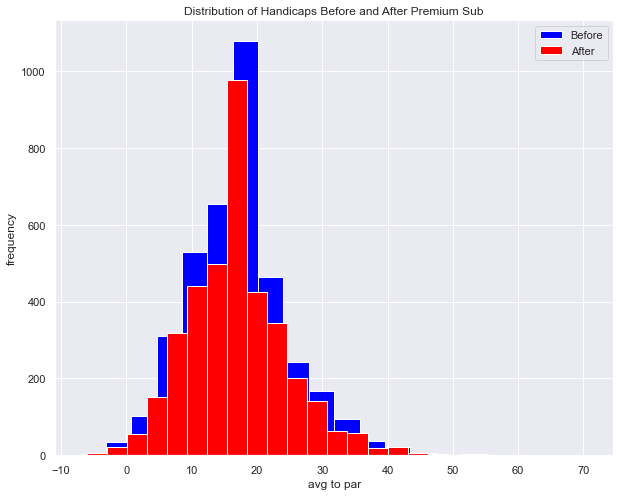

In [9]:
plt.figure(figsize = (10,8))
plt.hist(dfi['avgBeforeToPar'], color = 'blue', bins = 20, label = 'Before')
plt.hist(dfi['avgAfterToPar'], color = 'red', bins = 20, label = 'After')

plt.title('Distribution of Handicaps Before and After Premium Sub')
plt.xlabel('avg to par')
plt.ylabel('frequency')
plt.legend()

plt.show()

As we can see from the distribution of avg to par, there are more people who score lower after getting premium (distribution shifted to the left for after).

## Difference in Outcomes Calculation

In [10]:
dfi1 = pd.DataFrame()

dfi1['diff_hdc'] = dfi['avgBeforeToPar'] - dfi['avgAfterToPar']

dfi1['diff_fwh'] = dfi['avgAfterFairwayHits'] - dfi['avgBeforeFairwayHits']

dfi1['diff_gir'] = dfi['avgAfterGir'] - dfi['avgBeforeGir']

dfi1['diff_pph'] = dfi['avgBeforePuttsPerHole'] - dfi['avgAfterPuttsPerHole']

dfi1['diff_und'] = dfi['avgAfterUpAndDownPercentage'] - dfi['avgBeforeUpAndDownPercentage']

For simplicity, we will use the average score to par before and after as the handicap for each player to measure whether they improved or not. I have also framed the equations here to have positive results for improvement for all variables. For example, diff_hdc and diff_pph is calculated by subtracting after from before to have positive value for improvement since lower is better for the two of them, but the rest are subtracting before from after.

In [11]:
dfi1

,diff_hdc,diff_fwh,diff_gir,diff_pph,diff_und
0,5.000000,-0.666667,2.000000,0.000000,-1.936027
1,0.633333,-0.533333,0.033333,-0.012963,4.044234
2,2.333333,-0.333333,0.000000,0.092593,46.759259
3,3.000000,-1.333333,2.333333,-0.240741,4.960317
4,-5.033333,-1.966667,-3.366667,0.009259,-2.701539
...,...,...,...,...,...
3745,1.000000,1.666667,0.666667,-0.148148,-22.976190
3746,-4.333333,-3.000000,-4.000000,-0.018519,-2.222222
3747,-0.733333,-0.433333,-1.866667,-0.088889,-17.258510
3748,0.160021,-0.002189,0.010488,0.004088,0.338939


In [12]:
dfi1.mean()

diff_hdc    0.127140
diff_fwh   -0.032636
diff_gir    0.001152
diff_pph    0.004371
diff_und    0.378983
dtype: float64

The table above is the mean of the differences of each variable between before and after (improvement or not). We can see that fairway hits is the only variable that did not improve after premium based on the simple difference in outcome approach.

## Data Visualization

In [13]:
#percentage of population that improved after premium
print('percentage of population that improved in AVG to Par after premium:', (np.sum(dfi1.diff_hdc > 0)/len(dfi1))*100)

percentage of population that improved in AVG to Par after premium: 56.266666666666666


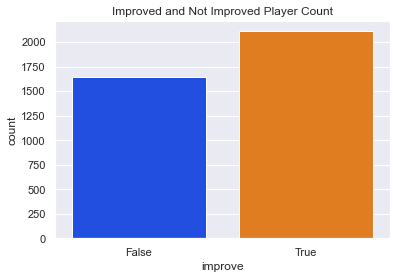

In [14]:
dfi['improve'] = (dfi1.diff_hdc > 0)

sns.countplot(x = 'improve', data = dfi, palette = 'bright')
plt.title('Improved and Not Improved Player Count')
plt.show()

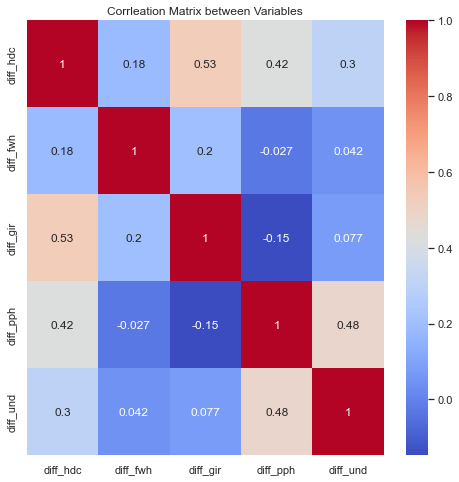

In [15]:
plt.figure(figsize = (8,8))
sns.heatmap(dfi1.corr(), annot = True, cmap = 'coolwarm')

plt.title('Corrleation Matrix between Variables')
plt.show()

This is a correlatin matrix to see which variable is correlated the most with each other. We are only going to focus on the outcome (diff_hdc) and its covariates (others). We can see that GIR is the most correlated variable amongst all the variables with diff_hdc with 0.53, which makes sense because the more greens you hit the better your score will be and if you are regularly getting GIRs, you are probably an above average golfer as well. The second highest correlated variable is putts per hole at 0.42, which also makes sense because sinking putts will lead to a better score. The lowest correlated varaibles is fairway hit at .2, which also makes sense because hitting the fairway doesn't equate to finishing the hole with par since your approach shots will also determine your score. One thing that I want to highlight here is the correlation between diff_pph and diff_gir, these values are negatively correlated to each other and my reasoning behind that is due to the fact that people are hitting the greens from farther out (>150 yards) and as a result they are farther away from the pin, which requires them to making longer and more difficult putts.

## Linear Regression Analysis

In [16]:
scaler = StandardScaler()

dfi1_s = pd.DataFrame(scaler.fit_transform(dfi1), columns = dfi1.columns)

We will be using the statistical significance threshold (alpha) at 5% or 0.05 as 95% confidence level is the generally accepted confidence level to determine statistical significance. We want to see p-values of the regression lower than 0.05 for each variable so they can be determined to be statistically significant.

### Total Sample

In [17]:
y = dfi1_s['diff_hdc']

x = dfi1_s[['diff_fwh', 'diff_gir', 'diff_pph', 'diff_und']]

x = sm.add_constant(x)

mod = sm.OLS(y, x).fit(cov_type = 'HC3')
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               diff_hdc   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     433.5
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          2.31e-307
Time:                        09:43:00   Log-Likelihood:                -3841.1
No. Observations:                3750   AIC:                             7692.
Df Residuals:                    3745   BIC:                             7723.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.036e-18      0.011   2.75e-16      1.0

Above is the regression for the entire population. Based on the p-values (0.387) given in the regression, the up and down percentage statistic is only one that is not statistically significant enough to be associated with improvement in handicap (avg to par). To interpret the rest of the regression, we can see that GIR's coefficient is at 0.59, which means that every one unit increase (improvement) in GIR can be corrleated to 0.59 increase in handicap differential between before and after. Same thing goes with putts per hole where each unit of improvement (in this case decrease) in putts per hole can be associated to 0.50 improvement in average score to par.

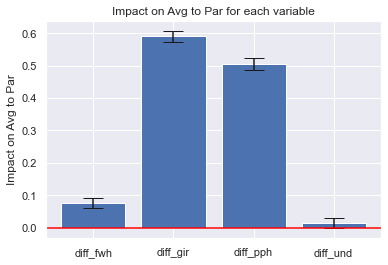

In [18]:
variables = ['diff_fwh','diff_gir', 'diff_pph', 'diff_und']
coefficients = mod.params.drop('const')
std_errors = mod.bse.drop('const')

plt.bar(variables, coefficients, yerr = std_errors, capsize = 10)
plt.axhline(0, color = 'red')

plt.ylabel('Impact on Avg to Par')
plt.title('Impact on Avg to Par for each variable')

plt.show()

### Improved Players Only

In [19]:
df_improved = dfi1[dfi1['diff_hdc'] > 0]

In [20]:
df_improved_s = pd.DataFrame(scaler.fit_transform(df_improved), columns = df_improved.columns)

yi = df_improved_s['diff_hdc']

xi = df_improved_s[['diff_fwh', 'diff_gir', 'diff_pph', 'diff_und']]

xi = sm.add_constant(xi)

mod1 = sm.OLS(yi, xi).fit(cov_type = 'HC3')
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:               diff_hdc   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     80.06
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.59e-63
Time:                        09:43:05   Log-Likelihood:                -2485.8
No. Observations:                2110   AIC:                             4982.
Df Residuals:                    2105   BIC:                             5010.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.301e-17      0.017   7.57e-16      1.0

Above is the regression with only the people who saw an improvement in average score to par. Similar to the regression with the entire sample, the p-values given in the regression, the up and down percentage statistic is only one that is not statistically significant enough to be associated with improvement in handicap (avg to par). To interpret the rest of the regression, we can see that GIR's coefficient is at 0.539, which means that every one unit increase in GIR can be corrleated to 0.539 increase in handicap differential between before and after. Same thing goes with putts per hole where each unit of improvement (in this case decrease) in putts per hole can be associated to 0.478 improvement in handicap differential.

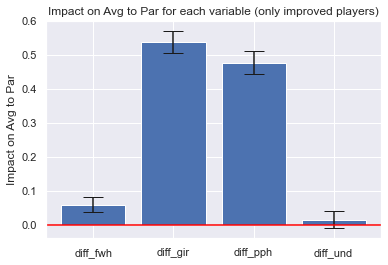

In [21]:
variables1 = ['diff_fwh','diff_gir', 'diff_pph', 'diff_und']
coefficients1 = mod1.params.drop('const')
std_errors1 = mod1.bse.drop('const')

plt.bar(variables1, coefficients1, yerr = std_errors1, capsize = 10)
plt.axhline(0, color = 'red')

plt.ylabel('Impact on Avg to Par')
plt.title('Impact on Avg to Par for each variable (only improved players)')

plt.show()

### Not Improved Players Only

In [22]:
#filter a new df with only NOT improved players
df_notimproved = dfi1[dfi1['diff_hdc'] <= 0]

In [23]:
#do regression on only the people who did NOT improved
df_notimproved_s = pd.DataFrame(scaler.fit_transform(df_notimproved), columns = df_notimproved.columns)

yii = df_notimproved_s['diff_hdc']

xii = df_notimproved_s[['diff_fwh', 'diff_gir', 'diff_pph', 'diff_und']]

xii = sm.add_constant(xii)

mod2 = sm.OLS(yii, xii).fit(cov_type = 'HC3')
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:               diff_hdc   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     78.55
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           5.17e-61
Time:                        09:43:08   Log-Likelihood:                -1934.6
No. Observations:                1640   AIC:                             3879.
Df Residuals:                    1635   BIC:                             3906.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.284e-16      0.020   6.57e-15      1.0

Above is the regression with only the people who saw an improvement in average score to par. Similar to the regression with the entire sample, the p-values given in the regression, the up and down percentage statistic is only one that is not statistically significant enough to be associated with improvement in handicap (avg to par). To interpret the rest of the regression, we can see that GIR's coefficient is at 0.546, which means that every one unit increase in GIR can be corrleated to 0.546 increase in handicap differential between before and after. Same thing goes with putts per hole where each unit of improvement (in this case decrease) in putts per hole can be associated to 0.436 improvement in handicap differential. This time, improve in fairway hits has a higher coefficient compared to the other two regressions at 0.111.

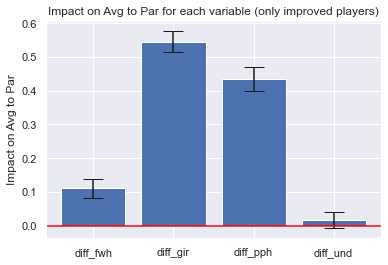

In [24]:
variables2 = ['diff_fwh','diff_gir', 'diff_pph', 'diff_und']
coefficients2 = mod2.params.drop('const')
std_errors2 = mod2.bse.drop('const')

plt.bar(variables2, coefficients2, yerr = std_errors2, capsize = 10)
plt.axhline(0, color = 'red')

plt.ylabel('Impact on Avg to Par')
plt.title('Impact on Avg to Par for each variable (only improved players)')

plt.show()

## Linear Regression Results

In [25]:
df_coef = pd.DataFrame()

df_coef['total samp'] = mod.params.drop('const')
df_coef['improved'] = mod1.params.drop('const')
df_coef['not improved'] = mod2.params.drop('const')

df_coef = df_coef.transpose()

df_coef.mean()

diff_fwh    0.082262
diff_gir    0.558408
diff_pph    0.472659
diff_und    0.014685
dtype: float64

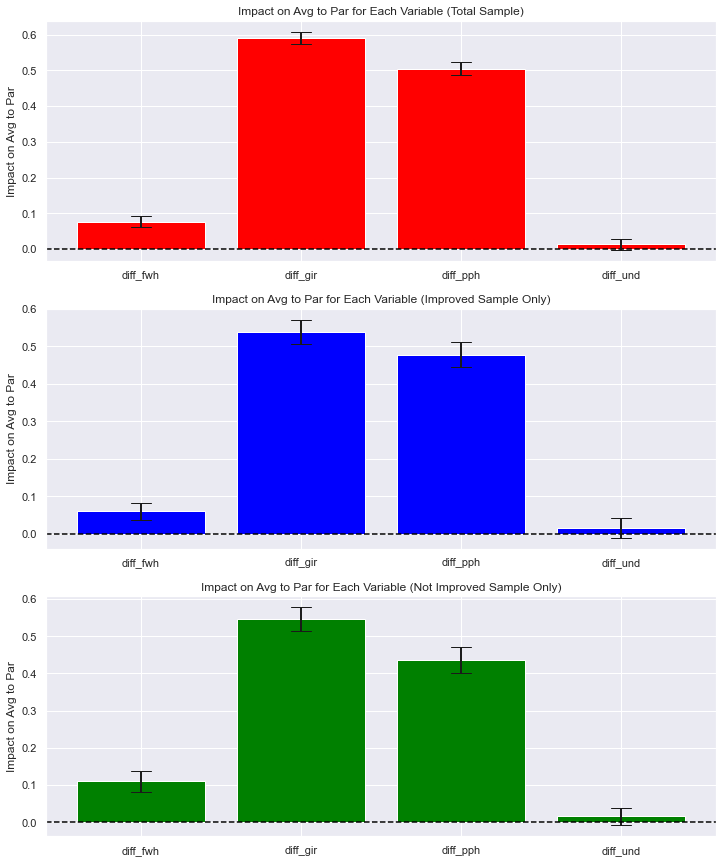

In [26]:
fig, axes = plt.subplots(3, 1, figsize = (12,15))

for ax in axes:
    axes[0].bar(variables, coefficients, yerr = std_errors, capsize = 10, color = 'red')
    axes[1].bar(variables1, coefficients1, yerr = std_errors1, capsize = 10, color = 'blue')
    axes[2].bar(variables2, coefficients2, yerr = std_errors2, capsize = 10, color = 'green')
    ax.axhline(0, color = 'black', linestyle = '--')
    ax.set_ylabel('Impact on Avg to Par')
    axes[0].set_title('Impact on Avg to Par for Each Variable (Total Sample)')
    axes[1].set_title('Impact on Avg to Par for Each Variable (Improved Sample Only)')
    axes[2].set_title('Impact on Avg to Par for Each Variable (Not Improved Sample Only)')

plt.show()  

In conclusion, GIR, PPH, and FWH are the three statistics that are associated with improvement in score to par with statistical significance. GIR has the highest impact with mean of 0.5584 across all three regressions and followed by PPH with mean of 0.4727 across all three regressions. The up and down statistic does not have statitiscally significant impact on improving score to par. The results are showing that GIR and PPH will be the most important statistic whether you improved or not from the premium feature, but we can say with 95% confidence that GIR and PPH will improve a player's avg score to par by 0.558 and 0.473 on average, respectively. Although the statistic mentioned above are associated with improving a player's handicap differential, we cannot assume causal relation as there is no control group to use as a baseline to measure the treatment, which would be the premium subscription. We can do further analysis to measure the treatment effect using various methods if we have a control group to use as a baseline.